Programmer: Giovanni Vecchione
Date: 2/12/24

Subject: Project 2
Fine-Tune and customize model from project 1.

MODEL 2 ver. 1- Image Classifier Using the Sequential API (w/ Batch Normalization and Dropout Layers)

4x hidden layers, 1x input layer (flatten), includes batch normalization and dropout layers

Data set: Keras database of fashion_mnist
Status: Done

NOTE: 
-Cleaned up format of code
-Use of  Dropout and Batch Normalization layers

In [25]:
import tensorflow as tf
import matplotlib as mpl
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)  # Initial learning rate of 0.001

model2_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(250, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),  # Change from ReLU,
    tf.keras.layers.Dropout(rate=0.10),

    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),  # Change from ReLU,
    tf.keras.layers.Dropout(rate=0.10),

    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),  # Change from ReLU,
   
    
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),  # Change from ReLU,
    
    tf.keras.layers.Dense(10, activation="softmax")
])

#NOTE: There is debate on which order the layers should be in, however generally dropout is after the activation function
#Although based on some research a recommended way to do it is; Dense/Convolutional , Batch Norm, Activation Function, then dropout

model2_1.summary()

model2_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2_1 = model2_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 250)               196250    
                                                                 
 batch_normalization_44 (Ba  (None, 250)               1000      
 tchNormalization)                                               
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 250)               0         
                                                                 
 dropout_22 (Dropout)        (None, 250)               0         
                                                                 
 dense_56 (Dense)            (None, 300)               75300     
                                                     

Testing: 

Original settings: 
dropout rates all .15 
activation all ReLU
neurons are 300 300 100 50 10

Epoch 30/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2400 - accuracy: 0.9103 - val_loss: 0.2988 - val_accuracy: 0.8894

Test #1:
lowered dropout rates to .1 and decreased the initial neurons from 300 to 250.

    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9205 - val_loss: 0.3016 - val_accuracy: 0.8894

Test #2:
added an optimizer to adjust learning rate. Changed to .002
Epoch 30/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2205 - accuracy: 0.9186 - val_loss: 0.2976 - val_accuracy: 0.8912

Test #3: (CURRENT SET UP)
Increasing learning rate from .002 to .005
Activation all ReLU
DropRate: all .1 
Neurons: 250 300 100 50 10

Epoch 30/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2156 - accuracy: 0.9209 - val_loss: 0.2891 - val_accuracy: 0.8956

Test #4:
Adding regularization layer to first dense layer (.001)
PERFORMED POORLY

Test #5:
Regularization layer to first dense layer set to .0001 holds some possible benefits, increased epochs to 50
Caused overfitting

Test #6:
Scrapping the regularization layer. Using leaky ReLU to see if this improves results.
Epoch 30/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9107 - val_loss: 0.3006 - val_accuracy: 0.8920

Test #7:
Moved dropout layer to third hidden layer
Epoch 30/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2323 - accuracy: 0.9148 - val_loss: 0.3041 - val_accuracy: 0.8892

Test #8:
LR: .005
DR: .1
Activation: Leaky ReLU
Neurons: 250 300 100 50 10

Epoch 30/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2419 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.8940

NOTE: Seems to be performing well with leaky ReLU

Final Observations:
Its possible that the simplicity of the model could be hindering the validation results. Accuracy is spot on, however
the loss can still be tuned.

Otherwise rebuild a new model.

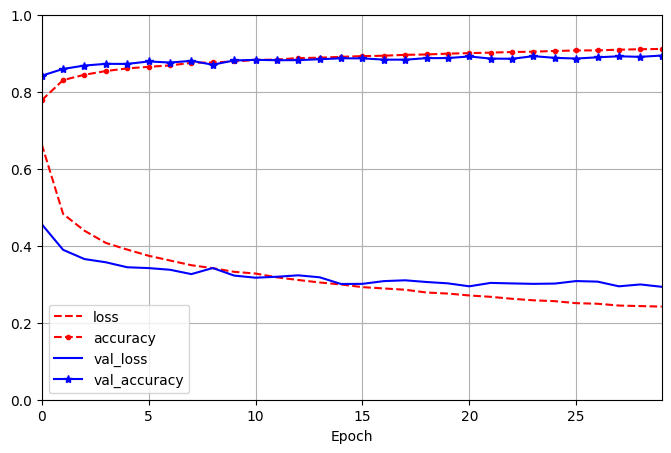

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

THINGS TO LOOK OUT FOR:

Overfitting - Regularization techniques (L1/L2 regularization, dropout), early stopping, and data augmentation can help combat overfitting.
    Classic Signs-
        Increasingly better training loss but worsening validation loss.
        Training accuracy might continually rise while validation accuracy plateaus or decreases.
    
    The Gap -
         A large and widening gap between the training and validation curves often indicates overfitting.

Underfitting -  Consider using a more complex model architecture, increase training epochs, or explore feature engineering to provide more informative data to your model.
    Poor Performance on Both -
        If both training and validation loss are high, and accuracy for both is low, your model might be underfitting.

Healthy Learning :

Convergence - It's normal for validation loss to be slightly higher than training loss. The model naturally performs a bit better on data it's been repeatedly exposed to.

Slightly Higher Validation Loss - Sharp spikes or drops in validation loss/accuracy could point to issues like a learning rate that's too high or instability in your data.